In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv  
from sklearn.preprocessing import StandardScaler, PolynomialFeatures   
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

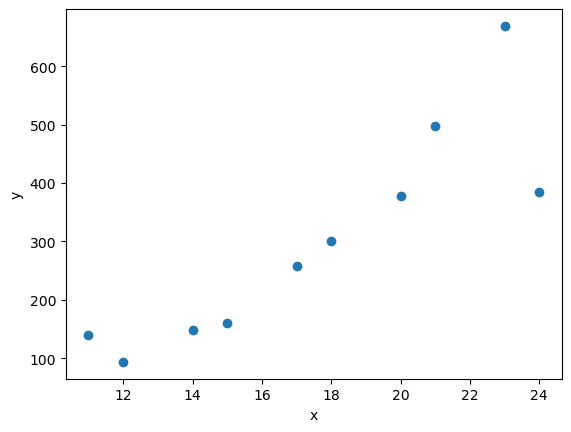

In [37]:
examples = []
with open("lin_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        examples.append([float(cell) for cell in row])

data = np.array(examples)
x_train = data[:, 0]
y_train = data[:, 1]

plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
standard_scaler = StandardScaler()
x_train = x_train.reshape(-1,1)

standard_scaler.fit(x_train)
x_train = standard_scaler.transform(x_train)

poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)


In [39]:
examples_test = []
with open("lin_reg_test.csv") as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        examples_test.append([float(cell) for cell in row])

data = np.array(examples_test)
x_test = data[:, 0]
y_test = data[:, 1]
x_test = x_test.reshape(-1,1)
x_test = standard_scaler.transform(x_test)

In [40]:
poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

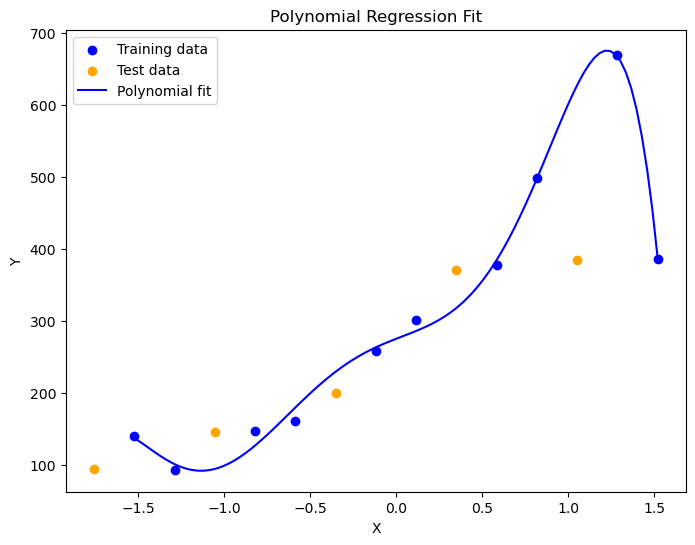

In [41]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

x_range = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

y_test_pred = model.predict(x_test_poly)

cost = np.mean((y_test_pred - y_test) ** 2) / 2

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='blue', label='Training data')
plt.scatter(x_test, y_test, c='orange', label='Test data')
plt.plot(x_range, y_range_pred, color='blue', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# y_train_pred = model.predict(x_train_poly)
# train_cost = np.mean((y_train_pred - y_train) ** 2) / 2
# print(f"Cost on training set: {train_cost}")
# print(f"Cost on test set: {cost}")


In [42]:
#Wyliczenie kosztu dla danych testowych
cost = np.mean((y_test_pred - y_test) ** 2) / 2
print(f"Cost on test set: {cost}")

#Wyliczenie kosztu dla danych uczących
y_train_pred = model.predict(x_train_poly)
train_cost = np.mean((y_train_pred - y_train) ** 2) / 2
print(f"Cost on training set: {train_cost}")

Cost on test set: 6713.344506573009
Cost on training set: 57.30884710253745


In [43]:
def h_fun(X, theta):
    return np.dot(theta.T,X)

def calculate_cost(X, y, theta, lambda_=0):
    m = X.shape[1]
    h = h_fun(X, theta)
    lin_reg_cost = np.mean((h - y) ** 2) / 2
    reg_term = (lambda_ / (2 * m)) * (theta[1:] ** 2).sum()  # 
    return lin_reg_cost + reg_term
    
def compute_gradients(X, y, theta, lambda_=0):
    m = X.shape[1]
    h = h_fun(X, theta) 
    gradients = (X @ (h - y).T) / m 
    theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
    gradients += (lambda_ / m) * theta_reg
    return gradients

In [44]:
lambdas = [10, 1, 0.01, 0.001, 0.0001]
theta = np.zeros((x_train_poly.shape[1], 1))

alpha = 0.01  # Współczynnik uczenia
iterations = 100000  # Liczba iteracji
results = {}

for lambda_ in lambdas:
    theta_opt = theta.copy()
    for _ in range(iterations):
        gradients = compute_gradients(x_train_poly.T, y_train, theta_opt, lambda_)
        theta_opt -= alpha * gradients

    train_cost = calculate_cost(x_train_poly.T, y_train, theta_opt, lambda_=0)
    test_cost = calculate_cost(x_test_poly.T, y_test, theta_opt, lambda_=0)
    results[lambda_] = {
        "theta": theta_opt,
        "train_cost": train_cost,
        "test_cost": test_cost
    }
    print(f"Lambda: {lambda_}, Train Cost: {train_cost}, Test Cost: {test_cost}")

Lambda: 10, Train Cost: 5686.148078391914, Test Cost: 3714.4436960226485
Lambda: 1, Train Cost: 1001.1228787292708, Test Cost: 2605.3006727355837
Lambda: 0.01, Train Cost: 61.18745870792536, Test Cost: 6620.060304323813
Lambda: 0.001, Train Cost: 57.38443002831674, Test Cost: 6715.905449628306
Lambda: 0.0001, Train Cost: 57.31771800560936, Test Cost: 6724.603497603205


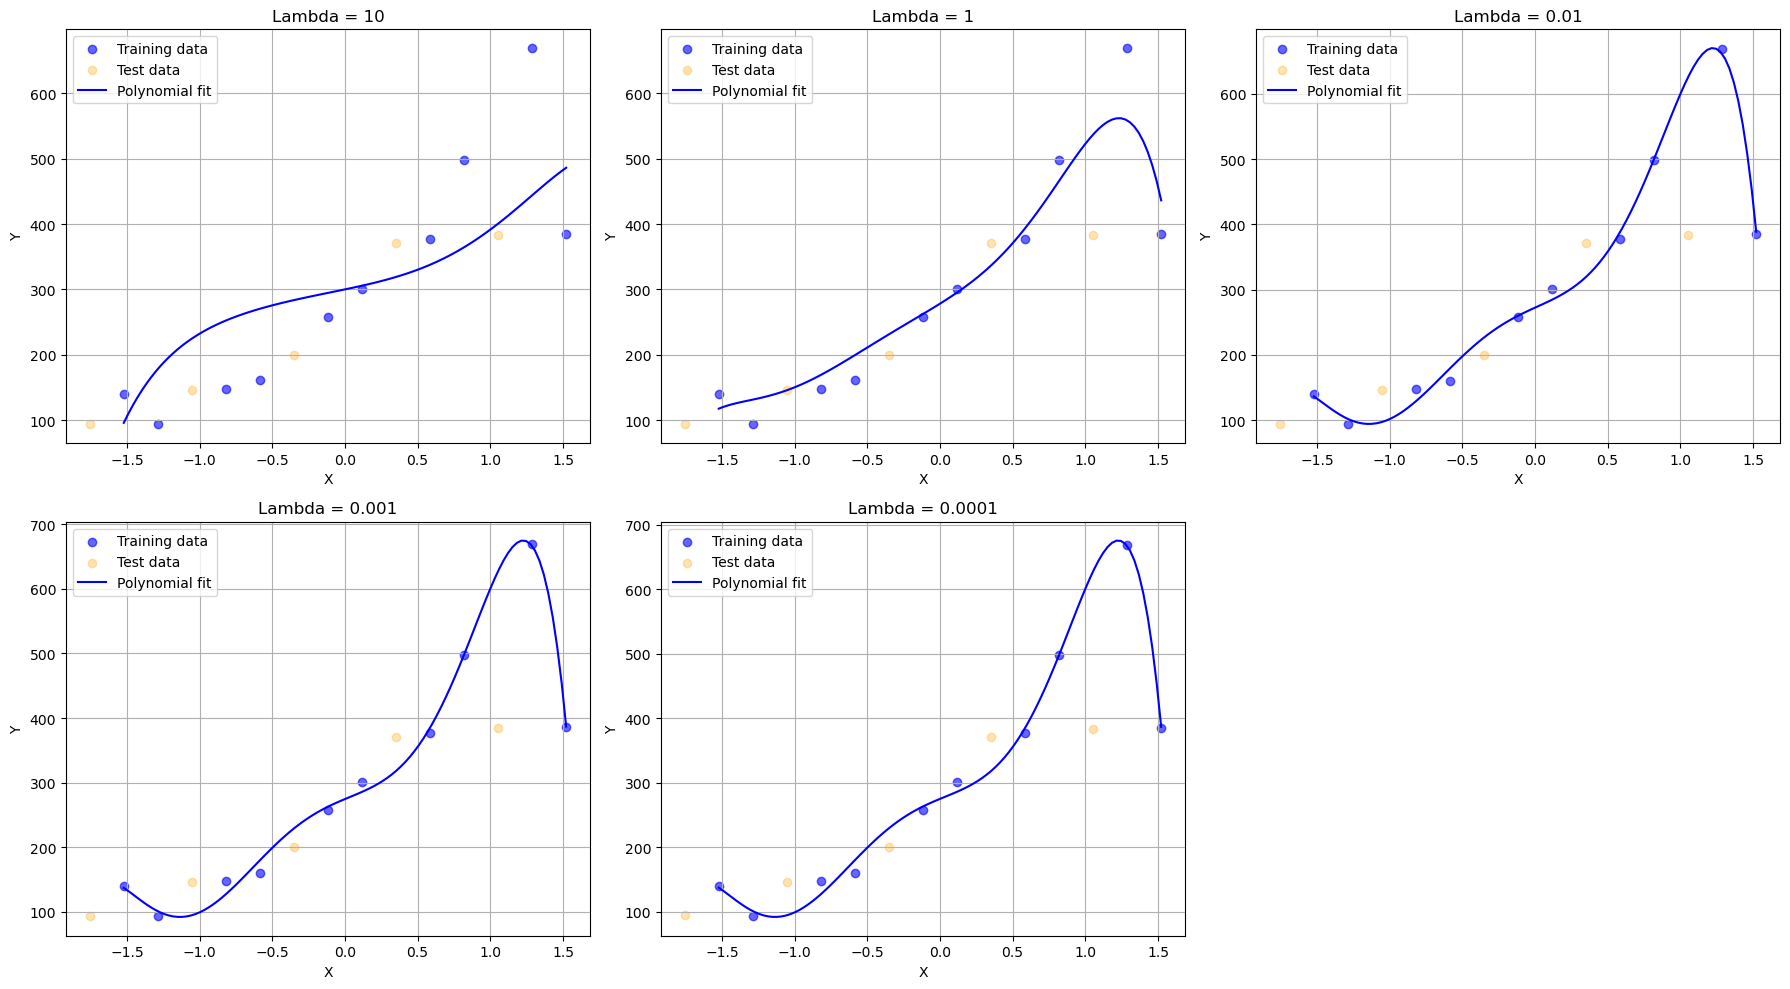

In [45]:
# Tworzenie nowej siatki wykresów
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, lambda_ in enumerate(lambdas):
    theta_opt = results[lambda_]["theta"]
    y_range_pred = x_range_poly @ theta_opt

    ax = axes[i]
    ax.scatter(x_train, y_train, c='blue', label='Training data', alpha=0.6)
    ax.scatter(x_test, y_test, c='orange', label='Test data', alpha=0.3)
    ax.plot(x_range, y_range_pred, color='blue', label='Polynomial fit')
    ax.set_title(f'Lambda = {lambda_}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    ax.legend()

# Usunięcie pustego wykresu jeśli lambdas < liczba subplotów
if len(lambdas) < len(axes):
    for j in range(len(lambdas), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Regresja logistyczna

In [46]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def h_fun(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

def calculate_cost(X, y, theta, lambda_=0):
    m = X.shape[0] 
    h = h_fun(X, theta)
    epsilon = 1e-10  
    
    cost = (-y * np.log(np.clip(h, epsilon, 1 - epsilon)) - (1 - y) * np.log(np.clip(1 - h, epsilon, 1 - epsilon))).mean()

    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:])) 
    
    return cost + reg_cost

def compute_gradients(X, y, theta, lambda_=0):
    m = X.shape[0]  
    h = h_fun(X, theta)
    gradients = (X.T @ (h - y)) / m  
    
    gradients[1:] += (lambda_ / m) * theta[1:]

    return gradients

def train_logistic_model(X, y, theta_init, alpha, iterations, lambda_):
    theta = theta_init.copy()
    for _ in range(iterations):
        grad = compute_gradients(X, y, theta, lambda_)
        theta -= alpha * grad
    return theta

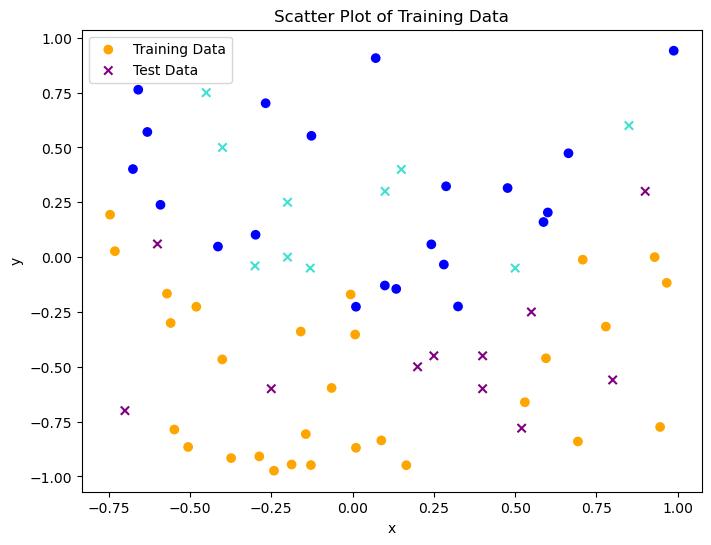

In [47]:
data_train = pd.read_csv("logi_reg_training.csv", header=None)
x_train = data_train.iloc[:, 0] 
y_train = data_train.iloc[:, 1]  
labels_train = data_train.iloc[:, 2]

data_test = pd.read_csv("logi_reg_test.csv", header=None)
x_test = data_test.iloc[:, 0]
y_test = data_test.iloc[:, 1]
labels_test = data_test.iloc[:, 2]

colors = ['blue' if label == 1 else 'orange' for label in labels_train]
colors_test = ['turquoise' if label == 1 else 'purple' for label in labels_test]
# Wykres danych treningowych
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c=colors, label='Training Data')
plt.scatter(x_test, y_test, c=colors_test, label='Test Data', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.show()

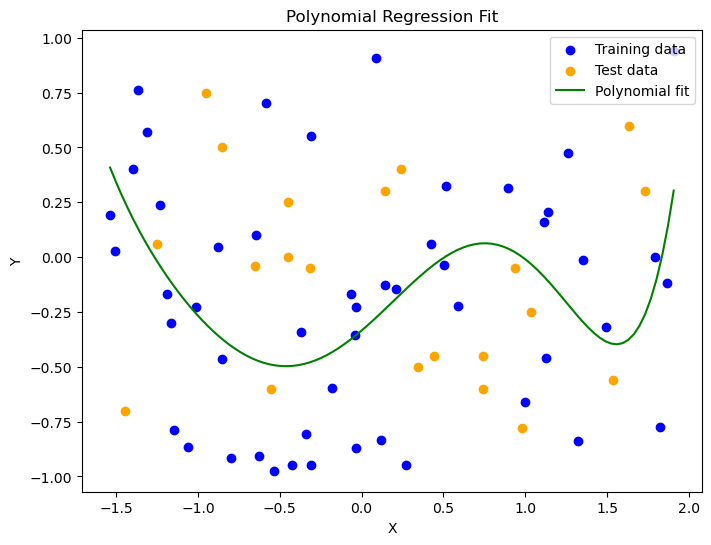

Cost on training set: 0.11678899011276832
Cost on test set: 0.18042591281625087


In [48]:
standard_scaler = StandardScaler()
x_train = x_train.values.reshape(-1, 1)
x_train = standard_scaler.fit_transform(x_train)

poly_features = PolynomialFeatures(degree=6)
x_train_poly = poly_features.fit_transform(x_train)

x_test = x_test.values.reshape(-1, 1)
x_test = standard_scaler.transform(x_test)
x_test_poly = poly_features.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)

x_range = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

y_test_pred = model.predict(x_test_poly)

cost = np.mean((y_test_pred - y_test) ** 2) / 2

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='blue', label='Training data')
plt.scatter(x_test, y_test, c='orange', label='Test data')
plt.plot(x_range, y_range_pred, color='green', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

y_train_pred = model.predict(x_train_poly)
train_cost = np.mean((y_train_pred - y_train) ** 2) / 2
print(f"Cost on training set: {train_cost}")
print(f"Cost on test set: {cost}")

In [53]:
# Parametry treningu
theta_init = np.zeros((x_train_poly.shape[1], 1))
iterations = 10000
alpha = 0.1
lambdas_log = [0, 10, 1, 0.5, 0.1, 0.05, 0.01]

# --- Trening modeli logistycznych ---
log_results = {}
for lambda_ in lambdas_log:
    theta_opt = train_logistic_model(x_train_poly, y_train, theta_init, alpha, iterations, lambda_)
    train_cost = float(calculate_cost(x_train_poly, y_train, theta_opt, lambda_=0))
    test_cost = float(calculate_cost(x_train_poly, y_test, theta_opt, lambda_=0))
    log_results[lambda_] = {
        "theta": theta_opt,
        "train_cost": train_cost,
        "test_cost": test_cost
    }


# --- Porównanie z scikit-learn ---
sklearn_results = {}
for lambda_ in lambdas_log:
    C = 1 / lambda_ if lambda_ != 0 else 1e10  # bardzo duża wartość C oznacza brak regularyzacji
    model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000, C=C)
    model.fit(x_train_poly, y_train.ravel())

    train_cost = float(np.mean(model.predict(x_train_poly) != y_train.ravel()))
    test_cost = float(np.mean(model.predict(x_train_poly) != y_test.ravel()))

    sklearn_results[lambda_] = {
        "train_cost": train_cost,
        "test_cost": test_cost
    }


# --- Tabela wyników ---
log_cost_df = pd.DataFrame([
    {
        "lambda": lam,
        "train_cost": log_results[lam]["train_cost"],
        "test_cost": log_results[lam]["test_cost"],
        "sklearn_train_cost": sklearn_results[lam]["train_cost"],
        "sklearn_test_cost": sklearn_results[lam]["test_cost"]
    }
    for lam in lambdas_log
])


print("Wyniki dla różnych wartości lambda:")
print(log_cost_df)

AttributeError: 'Series' object has no attribute 'reshape'